# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [34]:
import pandas as pd

In [35]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

### Análise de Fatores Influenciadores do Limite de Crédito

Nesta análise, buscamos identificar os principais fatores que influenciam o limite de crédito concedido às pessoas, utilizando três gráficos que trazem insights importantes.

#### 1. Gráfico de Dispersão: Salário vs Limite de Crédito

Este gráfico de dispersão foi escolhido para identificar se existe uma correlação entre o salário e o limite de crédito. Com a utilização do Seaborn, conseguimos criar um gráfico mais estilizado e informativo, que inclui uma linha de tendência (regressão linear) para facilitar a interpretação da relação entre as duas variáveis.

- **Justificativa**: O salário é um fator diretamente relacionado à capacidade financeira de uma pessoa, o que pode impactar na concessão de um limite de crédito mais elevado. Ao incluir a linha de tendência, podemos observar mais claramente se há uma correlação positiva entre salário e limite de crédito. A adição de cores e tamanhos diferenciados para os pontos também melhora a estética e a clareza do gráfico.

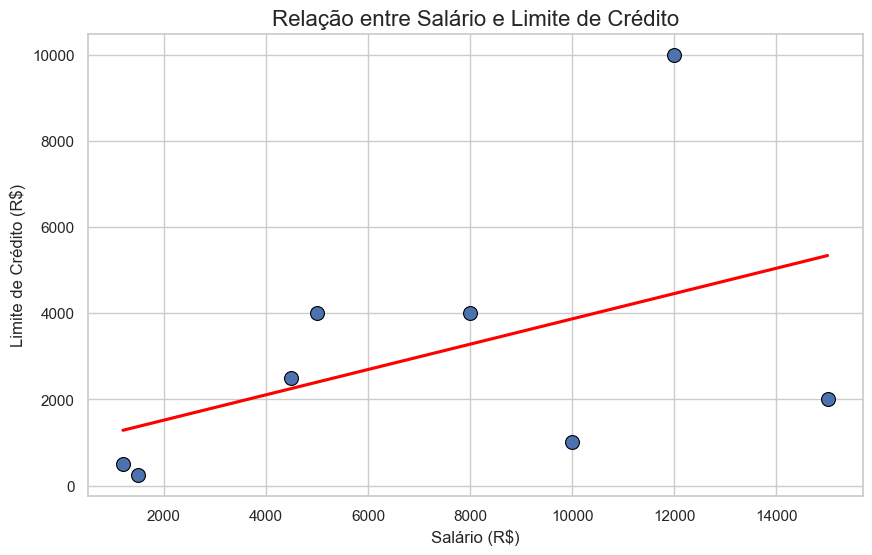

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convertendo os dados para valores numéricos
df['Salário'] = pd.to_numeric(df['Salário'])
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'])

# Configurações para melhorar o gráfico
plt.figure(figsize=(10, 6))

# Usando Seaborn para criar um gráfico de dispersão mais estilizado
sns.scatterplot(x='Salário', y='Limite_Credito', data=df, s=100, color='b', marker='o', edgecolor='black')

# Adicionando uma linha de tendência (regressão linear)
sns.regplot(x='Salário', y='Limite_Credito', data=df, scatter=False, color='red', ci=None)

# Adicionando título e rótulos aos eixos
plt.title('Relação entre Salário e Limite de Crédito', fontsize=16)
plt.xlabel('Salário (R$)', fontsize=12)
plt.ylabel('Limite de Crédito (R$)', fontsize=12)

# Adicionando uma linha de grade
plt.grid(True)

plt.show()


#### 2. Gráfico de Barras: Profissão vs Limite de Crédito Médio

Utilizamos um gráfico de barras verticais para visualizar a média do limite de crédito de acordo com cada profissão. Este formato facilita a comparação direta entre as profissões e o limite de crédito médio.

- **Justificativa**: O gráfico de barras verticais foi escolhido por sua eficácia em comparar valores entre categorias. Com a ordenação dos dados em ordem crescente, conseguimos identificar rapidamente quais profissões têm limites de crédito médios mais altos ou mais baixos. A paleta de cores "viridis" torna a visualização mais atraente e ajuda a destacar as diferenças entre as profissões. A rotação dos rótulos no eixo x melhora a legibilidade, permitindo uma fácil interpretação dos dados. Este gráfico nos ajuda a entender como a profissão pode influenciar o limite de crédito concedido pelas instituições financeiras.

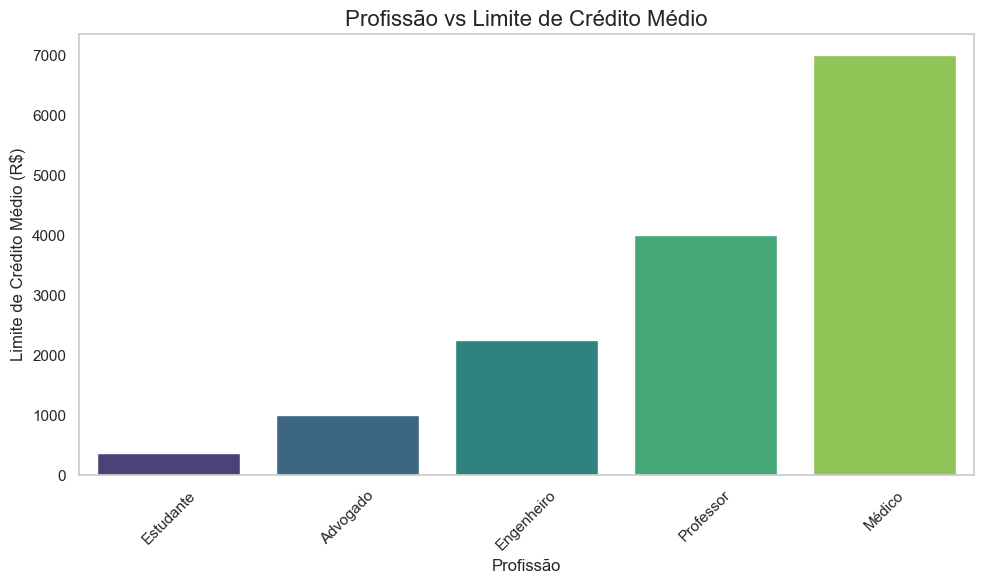

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando a média do limite de crédito por profissão e ordenando em ordem crescente
media_limite_credito = df.groupby('Profissão')['Limite_Credito'].mean().sort_values()

# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Usando Seaborn para criar um gráfico de barras verticais colorido
sns.barplot(x=media_limite_credito.index, y=media_limite_credito.values, hue=media_limite_credito.index, palette='viridis', dodge=False)

# Adicionando título e rótulos aos eixos
plt.title('Profissão vs Limite de Crédito Médio', fontsize=16)
plt.xlabel('Profissão', fontsize=12)
plt.ylabel('Limite de Crédito Médio (R$)', fontsize=12)

# Adicionando uma linha de grade
plt.grid(axis='y')

plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade

# Removendo a legenda
plt.legend([], [], frameon=False)  # Remove a legenda

plt.tight_layout()  # Ajusta o layout para não cortar elementos
plt.show()


#### 3. Box Plot: Estado Civil vs Limite de Crédito

Neste box plot, comparamos a distribuição dos limites de crédito de acordo com o estado civil. Através deste gráfico, podemos observar se pessoas casadas tendem a ter limites de crédito mais elevados em comparação com pessoas solteiras.

- **Justificativa**: O estado civil pode estar relacionado à estabilidade financeira. Pessoas casadas podem ter maior renda familiar, influenciando na concessão de maiores limites de crédito.

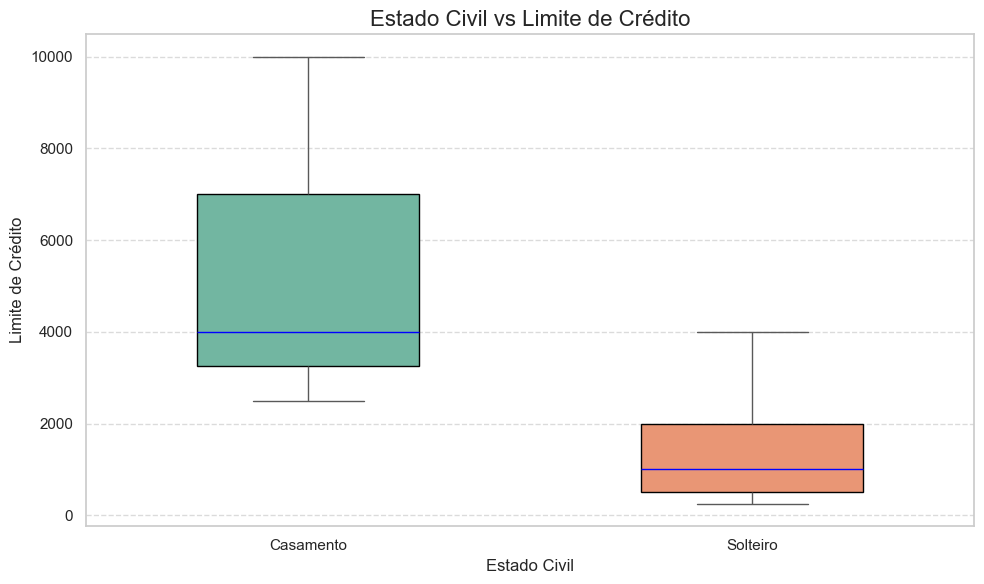

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo do Seaborn
sns.set(style='whitegrid')

# Criando o box plot
plt.figure(figsize=(10, 6))

# Criando o box plot e usando 'Estado_Civil' como hue
sns.boxplot(x='Estado_Civil', y='Limite_Credito', data=df, 
            hue='Estado_Civil', palette='Set2',  # Usando a paleta Set2
            boxprops=dict(edgecolor='black'), 
            flierprops=dict(markerfacecolor='red', marker='o'), 
            medianprops=dict(color='blue'),
            dodge=False, 
            width=0.5)  # Ajustando a largura das caixas

# Adicionando título e rótulos aos eixos
plt.title('Estado Civil vs Limite de Crédito', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Limite de Crédito', fontsize=12)

# Ajustando a linha de grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste para centralizar as caixas
plt.xticks(rotation=0)  # Garante que os rótulos do eixo x estejam retos

plt.tight_layout()  # Ajusta o layout para não cortar elementos

# Removendo a legenda já que estamos usando a cor para indicar o Estado Civil
# plt.legend(title='Estado Civil', loc='upper right')  # Adiciona legenda

plt.show()
